In [2]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 7.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 7.5 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 7.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 7.1 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 7.1 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 6.9 MB/s  0:00:01

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('dynamic_pricing.csv') 
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [5]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(exclude='object').columns

In [6]:
cat_features

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

In [7]:
#Feature Engineering 
import numpy as np

high_demand_percentile = 90
medium_high_demand_percentile = 75
medium_low_demand_percentile = 25
low_demand_percentile = 10

high_supply_percentile = 10
medium_high_supply_percentile = 25
medium_low_supply_percentile = 75
low_supply_percentile = 90

df['driver_to_rider_ratio'] = df['Number_of_Drivers'] / df['Number_of_Riders']


# Driver-to-Rider Ratio Based Multiplier
df['ratio_multiplier'] = np.where(df['driver_to_rider_ratio'] < 0.5, 1.1,  
                            np.where(df['driver_to_rider_ratio'] < 1, 1.05,  
                                     np.where(df['driver_to_rider_ratio'] > 1.5, 0.8, 1.0)))  

# Calculate demand and supply multipliers based on the new thresholds
df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], high_demand_percentile), 1.2,
                                   np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], medium_high_demand_percentile), 1.1,
                                            np.where(df['Number_of_Riders'] < np.percentile(df['Number_of_Riders'], medium_low_demand_percentile), 0.9,
                                                     np.where(df['Number_of_Riders'] < np.percentile(df['Number_of_Riders'], low_demand_percentile), 0.8, 1.0))))

df['supply_multiplier'] = np.where(df['Number_of_Drivers'] < np.percentile(df['Number_of_Drivers'], high_supply_percentile), 1.2,
                                   np.where(df['Number_of_Drivers'] < np.percentile(df['Number_of_Drivers'], medium_high_supply_percentile), 1.1,
                                            np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], medium_low_supply_percentile), 0.9,
                                                     np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], low_supply_percentile), 0.8, 1.0))))


# Time of day multiplier
df['time_of_day_multiplier'] = np.where(df['Time_of_Booking'] == 'Night', 1.1,
                                        np.where(df['Time_of_Booking'] == 'Afternoon', 1.0,
                                                 np.where(df['Time_of_Booking'] == 'Morning', 1.1, 0.9)))

# Location category multiplier
df['location_multiplier'] = np.where(df['Location_Category'] == 'Urban', 1.2,
                                     np.where(df['Location_Category'] == 'Suburban', 1.1, 1.0))

# Customer loyalty multiplier
df['loyalty_multiplier'] = np.where(df['Customer_Loyalty_Status'] == 'Gold', 0.8,
                                    np.where(df['Customer_Loyalty_Status'] == 'Silver',0.9, 1.0))

# Vehicle type multiplier
df['vehicle_multiplier'] = np.where(df['Vehicle_Type'] == 'Premium', 1.2, 1.0)

# Calculate adjusted ride cost
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * df['ratio_multiplier']  * df['demand_multiplier'] * df['supply_multiplier'] * df['time_of_day_multiplier'] * df['location_multiplier'] * df['loyalty_multiplier'] * df['vehicle_multiplier'] 

# price ceilings and floors
price_ceiling = 1.2 * df['Historical_Cost_of_Ride']
price_floor = 0.8 * df['Historical_Cost_of_Ride']

df['adjusted_ride_cost'] = np.clip(df['adjusted_ride_cost'], price_floor, price_ceiling)

In [8]:
#calclating profit percentage for each ride using dynamic pricing strategy
df['profit'] = (df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride'])
df['profit_percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100


profitable_rides = df[df['profit_percentage'] > 0]


loss_rides = df[df['profit_percentage'] < 0]
df['profit'].sum()

np.float64(47206.63278061939)

Text(0.5, 1.0, 'Distribution of Profits')

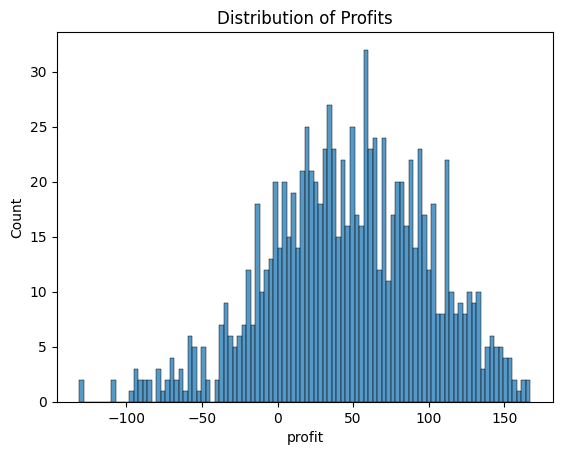

In [9]:
sns.histplot(df['profit'],bins=100)
plt.title('Distribution of Profits')

In [10]:
import plotly.graph_objects as go

#calculating the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)


labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title='Profitability of Rides')
fig.show()

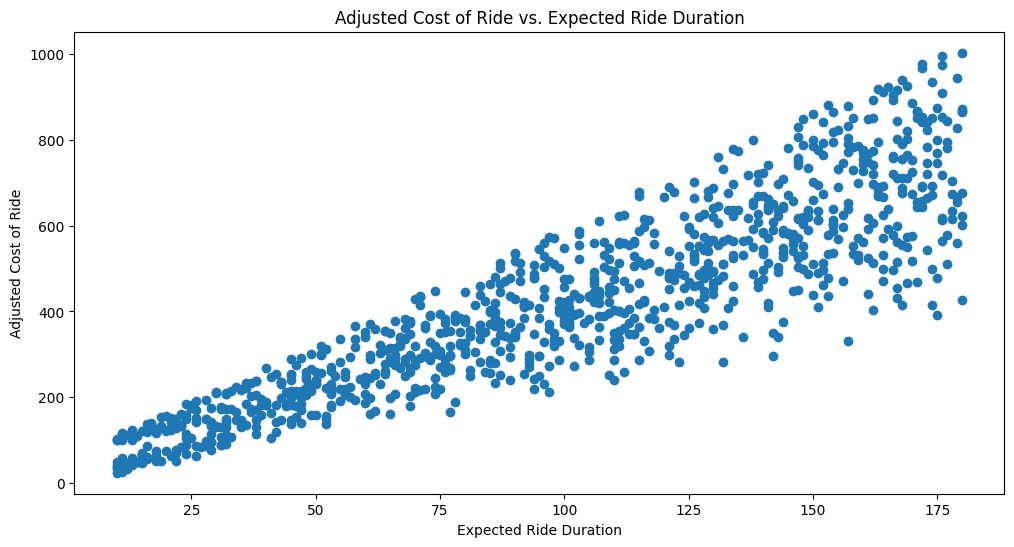

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Expected_Ride_Duration'], df['adjusted_ride_cost'])
plt.xlabel('Expected Ride Duration')
plt.ylabel('Adjusted Cost of Ride')
plt.title('Adjusted Cost of Ride vs. Expected Ride Duration')
plt.show()

In [12]:
#PreProcessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

X = df.drop(['demand_multiplier','Historical_Cost_of_Ride','supply_multiplier','adjusted_ride_cost','time_of_day_multiplier','profit','profit_percentage'],axis=1)
y = df['adjusted_ride_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
# Preprocess data
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features[:-1]),
        ('cat', cat_transformer, cat_features)
    ])

# Create the pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data
preprocessing_pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object'))]))])

In [14]:
X_train_scaled = preprocessing_pipeline.transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

In [15]:
#model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

def prediction_scores(y_pred,y_test):
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error : {mse}")
    print(f"Root Mean Squared Error : {rmse}")
    print(f"R Squared : {r2}")

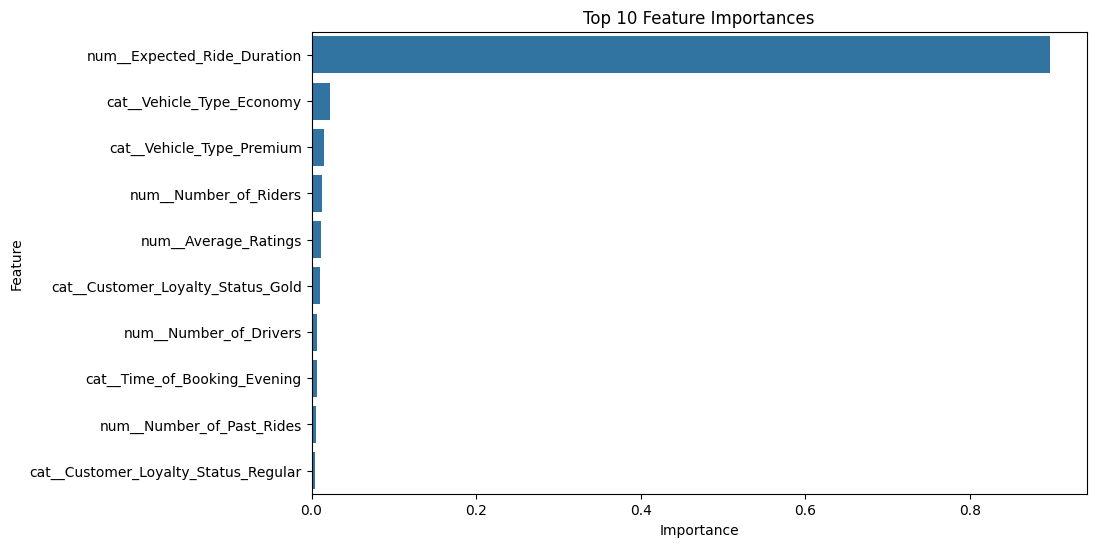

In [25]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best model from the grid search
best_model_tuned = grid_search.best_estimator_

# Get feature names from the preprocessor after fitting
feature_names = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Calculate feature importances
importances = best_model_tuned.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [16]:
scoring = {'r2': make_scorer(r2_score), 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False)}

models = {
    'LinearRegression': LinearRegression(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Find the best model based on default parameters
scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    scores[name] = r2_score(y_test, y_pred)
    print("Model Name:",name)
    prediction_scores(y_pred,y_test)
    print()

best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

Model Name: LinearRegression
Mean Squared Error : 7639.9462620451095
Root Mean Squared Error : 87.406786132686
R Squared : 0.8406448623803268



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\User

Model Name: KNeighbors
Mean Squared Error : 14273.65385456898
Root Mean Squared Error : 119.47239787737158
R Squared : 0.7022780008767306

Model Name: DecisionTree
Mean Squared Error : 16333.49487543748
Root Mean Squared Error : 127.80256208479344
R Squared : 0.6593135299110303

Model Name: RandomForest
Mean Squared Error : 8971.51922082329
Root Mean Squared Error : 94.71810397607888
R Squared : 0.8128707151784156

Model Name: GradientBoosting
Mean Squared Error : 7509.627966356009
Root Mean Squared Error : 86.65810963987161
R Squared : 0.8433630608115208


Best model: GradientBoosting


In [17]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

# Perform grid search and cross-validation for the best model
grid_search = GridSearchCV(best_model, param_grid, scoring=scoring, cv=5, refit='r2')
grid_search.fit(X_train_scaled, y_train)

print(f"{best_model_name} best score: {grid_search.best_score_:.4f}")
print(f"{best_model_name} best parameters: {grid_search.best_params_}")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Pro

GradientBoosting best score: 0.8476
GradientBoosting best parameters: {'max_depth': 3, 'n_estimators': 100}


In [18]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming `best_model`, `X_train_scaled`, and `y_train` are already defined
# For example, you might have:
# best_model = RandomForestRegressor()
# X_train_scaled = ...
# y_train = ...

# Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

# The `scoring` parameter is corrected to a valid string alias.
# We use 'neg_mean_squared_error' because GridSearchCV seeks to maximize a score,
# and a smaller MSE is better.
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    refit=True
)

# Perform the grid search and cross-validation on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the results of the grid search
print("Best score (negative MSE):", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

# To get the best model after fitting
best_model_tuned = grid_search.best_estimator_

# You can now use `best_model_tuned` to make predictions on new data
# For example:
# y_pred = best_model_tuned.predict(X_test_scaled)

Best score (negative MSE): -6949.826004703724
Best parameters: {'max_depth': 3, 'n_estimators': 100}


In [19]:
model = models[best_model_name]
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [20]:
number_of_riders = 65
number_of_drivers = 30
location = 'Urban'
customer_loyalty_status = 'Regular'
number_of_past_rides = 15
average_rating = 4
vehicle_type = "Economy"
time_of_booking = "Afternoon"
expected_ride_duration = 50

columns = ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration']
    
input_data = pd.DataFrame(np.array([[number_of_riders, number_of_drivers,location,customer_loyalty_status,number_of_past_rides,average_rating, time_of_booking,vehicle_type, expected_ride_duration]]),columns=columns)

In [21]:
input_data_scaled = preprocessing_pipeline.transform(input_data)

In [22]:
prediction = model.predict(input_data_scaled)
print("Predicted Price:",prediction[0])

Predicted Price: 225.3807550070762


In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train_scaled and y_train are already defined
X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Define the base models for stacking
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Fit the stacking model
stacking_regressor.fit(X_train_stack, y_train_stack)

# Evaluate the stacking model on the validation set
y_pred_stack = stacking_regressor.predict(X_val_stack)
stack_rmse = np.sqrt(mean_squared_error(y_val_stack, y_pred_stack))
print(f"Stacking Regressor RMSE: {stack_rmse:.4f}")

Stacking Regressor RMSE: 78.3242


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have already made predictions on your test set
# y_pred = best_model_tuned.predict(X_test_scaled)

# Calculate the regression metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Model Performance on Test Data:")
print("--------------------------------")
print(f"R-squared ($R^2$): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Model Performance on Test Data:
--------------------------------
R-squared ($R^2$): 0.8434
Mean Absolute Error (MAE): 64.4904
Mean Squared Error (MSE): 7509.6280
Root Mean Squared Error (RMSE): 86.6581
